# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2023-09-25 12:18:26.290157: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ls images

images/     train/      validation/


In [3]:
ls images/train/

angry/    disgust/  fear/     happy/    neutral/  sad/      surprise/


In [4]:
ls images/validation/

angry/    disgust/  fear/     happy/    neutral/  sad/      surprise/


Shape of the images

In [5]:
import cv2

im=cv2.imread('images/train/angry/1.jpg',cv2.IMREAD_GRAYSCALE)
print(type(im))
print(im.shape)
print(type(im.shape))

<class 'numpy.ndarray'>
(48, 48)
<class 'tuple'>


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255
       )
validation_datagen = ImageDataGenerator(
    rescale=1./255)
    

In [7]:
train_generator = train_datagen.flow_from_directory(
        'images/train',
        target_size=(48,48),
        batch_size = 32,
        color_mode = "grayscale",
        class_mode='categorical',
        shuffle=True
)

Found 28821 images belonging to 7 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
        'images/validation',
        target_size=(48,48),
        batch_size = 32,
        color_mode = "grayscale",
        class_mode='categorical',
        shuffle=False
)

Found 7066 images belonging to 7 classes.


In [11]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])
     

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001,epsilon=1e-6),
              metrics=['accuracy']
              )

In [15]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >70):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
     

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=28821//32,
      epochs=10,
      validation_data = validation_generator,
      callbacks = [callbacks]
       )

Epoch 1/10


2023-09-25 12:20:29.810357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-09-25 12:20:30.446333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-25 12:20:30.533614: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


899/900 [============================>.] - ETA: 0s - loss: 1.7999 - accuracy: 0.2572

2023-09-25 12:20:56.860818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-09-25 12:20:56.946788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 30s 31ms/step - loss: 1.7999 - accuracy: 0.2572 - val_loss: 1.7023 - val_accuracy: 0.3446
Epoch 2/10
900/900 [==============================] - 28s 31ms/step - loss: 1.6045 - accuracy: 0.3763 - val_loss: 1.5211 - val_accuracy: 0.4307
Epoch 3/10
900/900 [==============================] - 28s 31ms/step - loss: 1.4929 - accuracy: 0.4282 - val_loss: 1.4265 - val_accuracy: 0.4652
Epoch 4/10
900/900 [==============================] - 28s 31ms/step - loss: 1.4118 - accuracy: 0.4613 - val_loss: 1.3890 - val_accuracy: 0.4658
Epoch 5/10
900/900 [==============================] - 28s 31ms/step - loss: 1.3495 - accuracy: 0.4881 - val_loss: 1.3071 - val_accuracy: 0.5123
Epoch 6/10
900/900 [==============================] - 28s 31ms/step - loss: 1.3053 - accuracy: 0.5065 - val_loss: 1.2730 - val_accuracy: 0.5232
Epoch 7/10
900/900 [==============================] - 27s 30ms/step - loss: 1.2768 - accuracy: 0.5200 - val_loss: 1.2385 - val_accuracy: 0.5331
Epo

In [17]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
     

Text(0.5, 1.0, 'Training and validation loss')

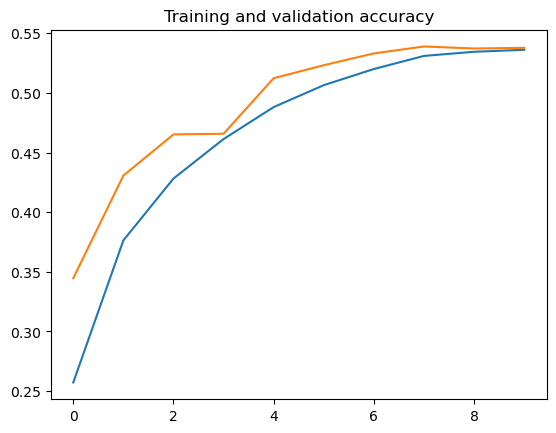

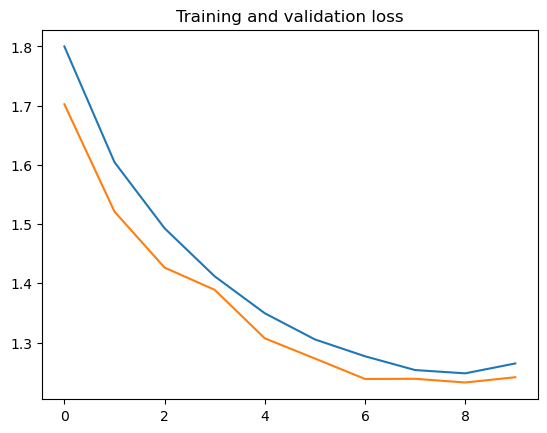

In [18]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )